<a href="https://colab.research.google.com/github/SutamaSarkar/RealiabilitySimulation/blob/main/Rel_series_parallel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
c1=0.9
c2=0.92
c3=0.87

rel_series=c1*c2*c3
rel_parallel=1-((1-c1)*(1-c2)*(1-c3))

print(f"RELIABILITY in series(analytical) = {rel_series:.4f}")
print(f"RELIABILITY in parallel(analytical) = {rel_parallel:.4f}")

RELIABILITY in series(analytical) = 0.7204
RELIABILITY in parallel(analytical) = 0.9990


In [3]:
N=10000
a=0
b=1
series=0
parallel=0

for i in range(1,N+1):
    x= random.uniform(a,b)
    y= random.uniform(a,b)
    z= random.uniform(a,b)

    comp1= (x<=c1)
    comp2= (y<=c2)
    comp3= (z<=c3)

    if comp1 and comp2 and comp3:
        series+=1
    if comp1 or comp2 or comp3:
        parallel+=1
series_prob= series/N
parallel_prob= parallel/N

print(f"RELIABILITY in series(experimental) = {series_prob:.4f}")
print(f"RELIABILITY in parallel(experimental) = {parallel_prob:.4f}")



RELIABILITY in series(experimental) = 0.7186
RELIABILITY in parallel(experimental) = 0.9992



TRIALS(N)	SERIES		PARALLEL
_________________________________________________________________________
5		0.4			1.000000
10		0.8			1.000000
50		0.66			1.000000
100		0.73			1.000000
500		0.732			1.000000
1000		0.715			1.000000
5000		0.7292			0.999000
10000		0.7209			0.999300
50000		0.7166			0.998960
100000		0.7196			0.999040
500000		0.720886			0.998968
1000000		0.720214			0.998915
10000000		0.7200952			0.998964


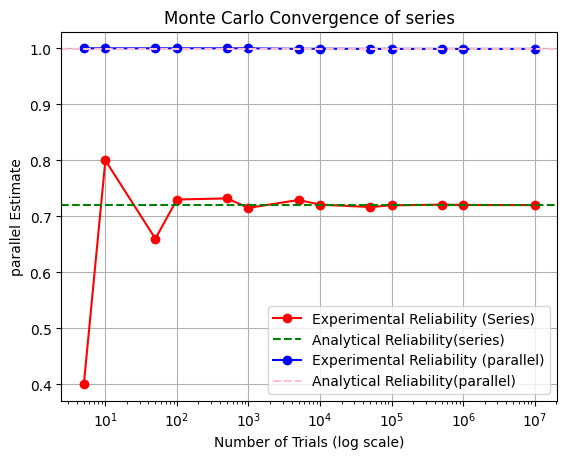

In [4]:
trial_list=[5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,10000000]
N_list= []
series_list = []
parallel_list = []

print("\nTRIALS(N)\tSERIES\t\tPARALLEL")
print("_________________________________________________________________________")
for N in trial_list:
    a=0
    b=1
    series=0
    parallel=0
    for i in range(1,N+1):
        x= random.uniform(a,b)
        y= random.uniform(a,b)
        z= random.uniform(a,b)

        comp1= (x<=c1)
        comp2= (y<=c2)
        comp3= (z<=c3)

        if comp1 and comp2 and comp3:
            series+=1
        if comp1 or comp2 or comp3:
            parallel+=1
    series_prob= series/N
    parallel_prob= parallel/N

    N_list.append(N)
    series_list.append(series_prob)
    parallel_list.append(parallel_prob)


for i in range(len(N_list)):
    print(f"{N_list[i]}\t\t{series_list[i]}\t\t\t{parallel_list[i]:.6f}")

#plt.figure(figsize=(5,5))
#plt.plot(N_list,color="green", series_list, marker="o", label="Estimated Prob of (series)")
#plt.axhline(rel_series,color="red", linestyle="--", label="Actual Pi")

plt.plot(N_list, series_list,
         color="red", marker="o",
         label="Experimental Reliability (Series)")

plt.axhline(rel_series,
            color="green", linestyle="--",
            label="Analytical Reliability(series)")

plt.plot(N_list, parallel_list,
         color="blue", marker="o",
         label="Experimental Reliability (parallel)")

plt.axhline(rel_parallel,
            color="pink", linestyle="--",
            label="Analytical Reliability(parallel)")

plt.xscale("log")
plt.xlabel("Number of Trials (log scale)")
plt.ylabel("series Estimate")
plt.ylabel("parallel Estimate")
plt.title("Monte Carlo Convergence of series")
plt.legend()
plt.grid(True)
plt.show()